In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

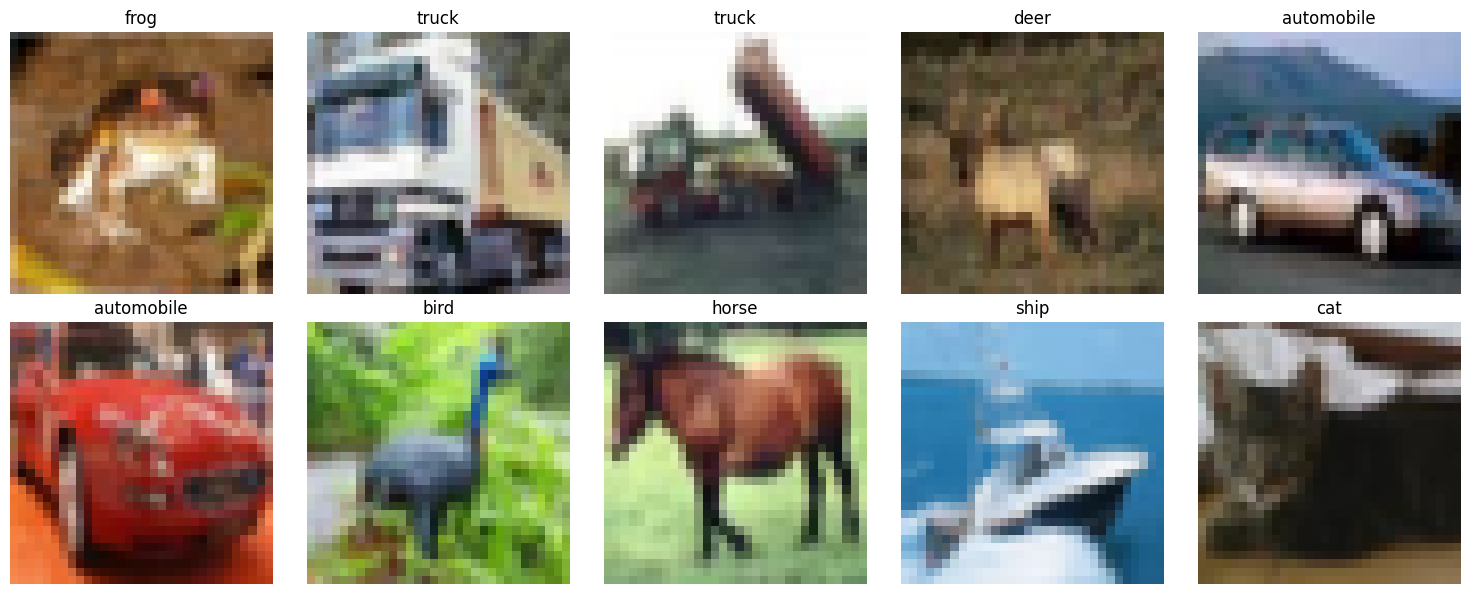

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6), dpi=100)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(class_names[y_train[i][0]])  # or .item()
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Define the CNN + Transformer model
# Define a simple CNN model
def simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model



# Compile model
model = simple_cnn(input_shape=x_train.shape[1:], num_classes=num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [17]:
# Train model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

Epoch 1/100
391/391 - 22s - loss: 1.6552 - accuracy: 0.4512 - val_loss: 2.2439 - val_accuracy: 0.2706 - lr: 0.0010 - 22s/epoch - 57ms/step
Epoch 2/100
391/391 - 18s - loss: 1.1632 - accuracy: 0.5872 - val_loss: 1.1659 - val_accuracy: 0.6089 - lr: 0.0010 - 18s/epoch - 46ms/step
Epoch 3/100
391/391 - 18s - loss: 1.0149 - accuracy: 0.6418 - val_loss: 1.0958 - val_accuracy: 0.6276 - lr: 0.0010 - 18s/epoch - 47ms/step
Epoch 4/100
391/391 - 19s - loss: 0.9390 - accuracy: 0.6704 - val_loss: 1.0330 - val_accuracy: 0.6932 - lr: 0.0010 - 19s/epoch - 48ms/step
Epoch 5/100
391/391 - 19s - loss: 0.8831 - accuracy: 0.6888 - val_loss: 0.9052 - val_accuracy: 0.6954 - lr: 0.0010 - 19s/epoch - 48ms/step
Epoch 6/100
391/391 - 20s - loss: 0.8476 - accuracy: 0.7032 - val_loss: 0.8877 - val_accuracy: 0.7025 - lr: 0.0010 - 20s/epoch - 50ms/step
Epoch 7/100
391/391 - 19s - loss: 0.8049 - accuracy: 0.7161 - val_loss: 0.8129 - val_accuracy: 0.7295 - lr: 0.0010 - 19s/epoch - 48ms/step
Epoch 8/100
391/391 - 19s -

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predicted class labels from model
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


313/313 [==============================] - 1s 2ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.89      0.86      0.87      1000
  automobile       0.91      0.96      0.93      1000
        bird       0.85      0.77      0.81      1000
         cat       0.79      0.68      0.73      1000
        deer       0.84      0.84      0.84      1000
         dog       0.85      0.74      0.79      1000
        frog       0.75      0.96      0.84      1000
       horse       0.90      0.89      0.90      1000
        ship       0.93      0.92      0.93      1000
       truck       0.87      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [19]:
# Calculate overall test accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Overall Test Accuracy: {accuracy:.4f}")


Overall Test Accuracy: 0.8566


In [20]:
# Per-class accuracy
correct_per_class = np.zeros(10)
total_per_class = np.zeros(10)

for true, pred in zip(y_true, y_pred):
    total_per_class[true] += 1
    if true == pred:
        correct_per_class[true] += 1

print("\nPer-Class Accuracy:")
for i in range(10):
    acc = correct_per_class[i] / total_per_class[i]
    print(f"{class_names[i]}: {acc:.4f}")



Per-Class Accuracy:
airplane: 0.8560
automobile: 0.9570
bird: 0.7710
cat: 0.6790
deer: 0.8410
dog: 0.7410
frog: 0.9620
horse: 0.8940
ship: 0.9200
truck: 0.9450


Confusion Matrix:

[[856  16  29   5   7   1   9   5  36  36]
 [  3 957   0   0   0   1   3   0   3  33]
 [ 36   4 771  26  38  24  75  14   5   7]
 [  9  10  33 679  42  78  93  23  10  23]
 [  7   1  27  14 841   8  75  22   4   1]
 [ 10   3  15 109  40 741  48  28   0   6]
 [  3   2   8   8   5   2 962   4   2   4]
 [  5   0  14  18  26  18  15 894   2   8]
 [ 26  17   4   3   0   0   7   1 920  22]
 [  2  40   1   2   1   0   3   0   6 945]]


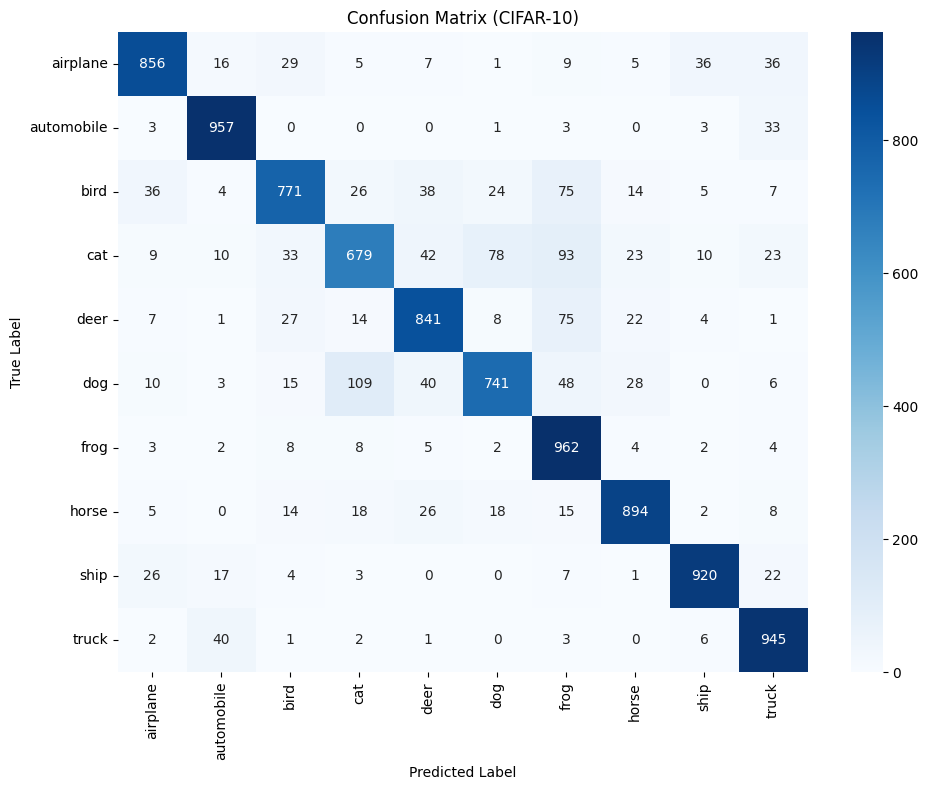

In [21]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display raw confusion matrix
print("Confusion Matrix:\n")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix (CIFAR-10)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


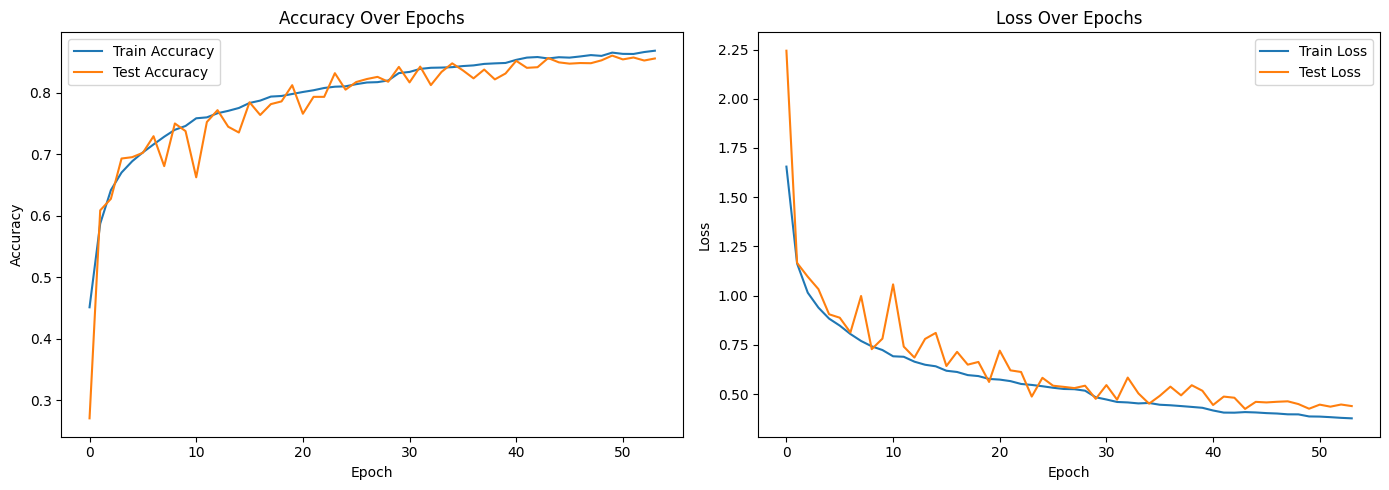

In [22]:
plt.figure(figsize=(14, 5), dpi=100)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


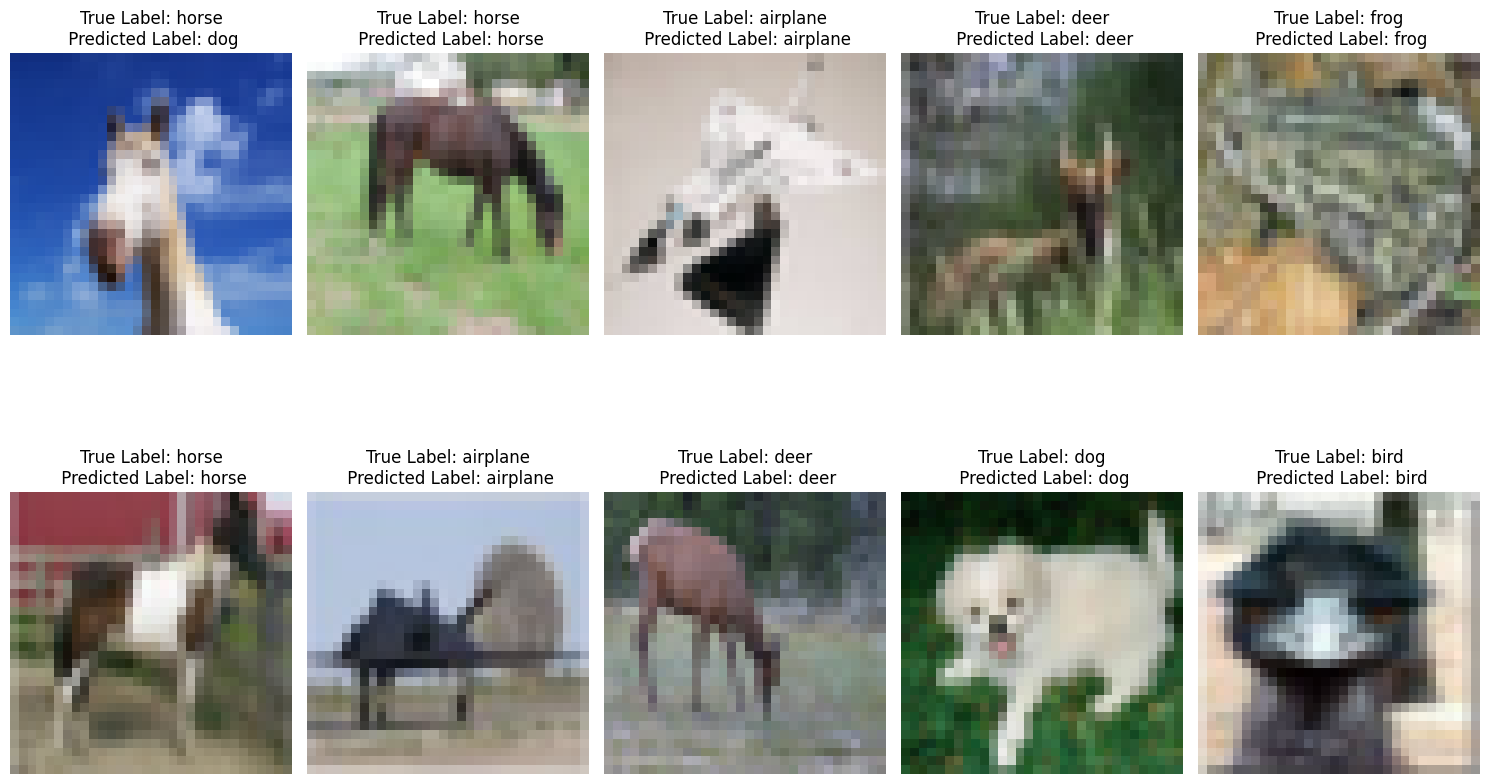

In [23]:
import random

plt.figure(figsize=(15, 10))
indices = random.sample(range(len(x_test)), 10)

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    true_label = class_names[y_test[idx][0]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"True Label: {true_label}\n Predicted Label: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
